# Попытка представить процесс визуально
## Пробуем на вкус matplotlib
### 1

In [1]:
# Начальные объявления
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Модели для пункта 4)
from sklearn.linear_model import ARDRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import HuberRegressor

dataframe = pandas.read_excel("usd_rate_28.xlsx")
rate = dataframe.curs
length = len(rate)

### 2

In [2]:
def fill_all(past = 28):  # Вынесем в отдельную функцию все для заполнения выборок
    past_days = []        # из чего составляем данные
    current_day = []
    past_columns = []
    global rate, length
    for day in range(past, length):
        slc = list(rate[(day-past):day])
        past_days.append(slc)   
        current_day.append(rate[day]) 
    for i in range(past):
        past_columns.append(f"past_{i}")
    global X,y
    X = pandas.DataFrame(data=past_days, columns=past_columns)
    y = pandas.Series(current_day, name='target')
    global X_train
    X_train = X[:-10]   # Закроем глаза на использование глобальных переменных
    global y_train
    y_train = y[:-10] 
    global X_test
    X_test = X[-10:]    # зато тестить удобно
    global y_test
    y_test = y[-10:]    # Да и попытка "в лоб" сделать это через возврат кортежа потерпела неудачу
    # return X[:-size], y[:-size], X[-size:], y[-size:]
    # return X_train, y_train, X_test, y_test

### 3

In [3]:
# Попробуем вынести в отдельную функцию расчет и отрисовку моделей для отображения на 1 графике
def make_and_paint(*models):
    best_model = ""
    best_mae = 2        # костыль, теоретически погрешность может быть дофига, но на практике видел лишь 1.*
    best_msqe = 0       # эта штука тут только для разнообразия метрик погрешностей
    for model in models:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        plt.plot(prediction, label=f"Prediction of {model}")
        mae = mean_absolute_error(prediction, y_test)
        msqe = mean_squared_error(prediction, y_test)
        print(f"MAE of {model} = {mae}")
        print(f"MSQE of {model} = {msqe}")
        if mae < best_mae:
            best_mae = mae
            best_msqe = msqe
            best_model = model
    # Как-то выделим наш реальный курс, спасибо гугль
    plt.plot(list(y_test), label=f"Real", linewidth=5, linestyle=':', dash_capstyle='round')
    # Перенесем легенду вбок, чтобы на тестовом графике она не заслоняла половину графика
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Жирненько выделим нашу лучшую модель
    print('\033[1m' + f"Best model was {best_model} with mae = {best_mae} msqe = {best_msqe}" + '\033[0m')

### 4

In [4]:
# X_train, y_train, X_test, y_test = filldays(std_past)   
fill_all()   # Заполним массивы для "стандартного" отрезка в 28 дней

### 5

MAE of LinearRegression() = 0.44316797938671326
MSQE of LinearRegression() = 0.2737881397352473
MAE of MLPRegressor(activation='identity', hidden_layer_sizes=(100, 200, 300),
             max_iter=5000, solver='lbfgs') = 0.4326285551951983
MSQE of MLPRegressor(activation='identity', hidden_layer_sizes=(100, 200, 300),
             max_iter=5000, solver='lbfgs') = 0.25145448166047785
MAE of MLPRegressor(hidden_layer_sizes=(100, 200, 300), max_iter=5000, solver='lbfgs') = 0.44030659915599984
MSQE of MLPRegressor(hidden_layer_sizes=(100, 200, 300), max_iter=5000, solver='lbfgs') = 0.24296279289409878
Best model was MLPRegressor(activation='identity', hidden_layer_sizes=(100, 200, 300),
             max_iter=5000, solver='lbfgs') with mae = 0.4326285551951983 msqe = 0.25145448166047785


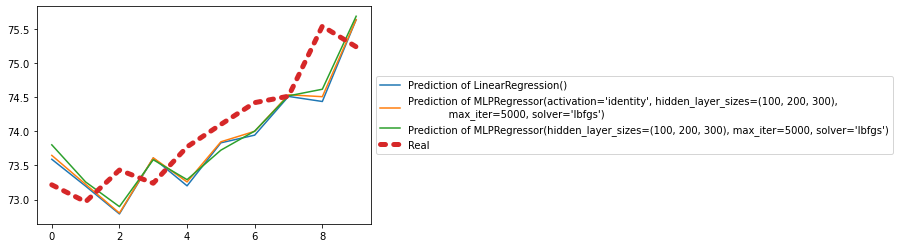

In [5]:
# Экспериментируем с моделью MLPRegressor
# Дополнение - результаты вычислений - какой-то рандом, меняющийся в два с лишним раза просто при перезапуске
# кода. так что здесь просто перебором выберем что-нибудь покрасивее с разумным количеством параметров
# взяв линейную регрессию как "эталон" качества.
# Возможно, зная теорию, можно будет подбирать их с умом, а пока... как то так

lr_model = LinearRegression()    # Линейная модель для сравнения
mlp_model1 = MLPRegressor()
mlp_model2 = MLPRegressor(max_iter=1000, hidden_layer_sizes=(200, 200, 200))

# activation logistic и tanh выдали бОльшую погрешность
# а identity чаще выдавал лучшие результаты чем стандартный relu

mlp_model3 = MLPRegressor(max_iter=1000, hidden_layer_sizes=(300, 300, 300), activation = 'identity')

# sgf solver выдает предупреждения и ошибки, ну и черт с ним. Выбранному солверу явно нужно мнооого операций
# а вот activation незаметно чтобы влиял

mlp_model4 = MLPRegressor(max_iter=5000, hidden_layer_sizes=(300, 300, 300), activation = 'identity', solver = 'lbfgs')
mlp_model5 = MLPRegressor(max_iter=5000, hidden_layer_sizes=(300, 300, 300), solver = 'lbfgs')
mlp_model6 = MLPRegressor(max_iter=5000, hidden_layer_sizes=(100, 200, 300), activation = 'identity', solver = 'lbfgs')
mlp_model7 = MLPRegressor(max_iter=5000, hidden_layer_sizes=(100, 200, 300), solver = 'lbfgs')
mlp_model8 = MLPRegressor(max_iter=5000, hidden_layer_sizes=(300, 200, 100), activation = 'identity', solver = 'lbfgs')
mlp_model9 = MLPRegressor(max_iter=5000, hidden_layer_sizes=(300, 200, 100), solver = 'lbfgs')

# 6 и 7 модели часто выдают результат лучше чем линейная (0.37575 пока рекорд) так что остановимся на этом.
# эксперименты с learning rate лишь ухудшали результат

# страшный тестовый график
# ------------------------
# make_and_paint(lr_model, mlp_model1, mlp_model2, mlp_model3, mlp_model4, mlp_model5, mlp_model6, mlp_model7, mlp_model8, mlp_model9)
# ------------------------
# выведем красивый с линейной моделью и двумя нашими финалистками
# Однако на нем часто сливается линейная модель с одной из наших.
# Думаю есть технические способы разделить их более наглядно, но времени их искать нет
make_and_paint(lr_model, mlp_model6, mlp_model7)

### 6

MAE of LinearRegression() = 0.44316797938671326
MSQE of LinearRegression() = 0.2737881397352473
MAE of ARDRegression() = 0.39572427366009466
MSQE of ARDRegression() = 0.21462398173874436
MAE of AdaBoostRegressor(n_estimators=150) = 0.35907276670442484
MSQE of AdaBoostRegressor(n_estimators=150) = 0.2047147551089273
MAE of HuberRegressor(epsilon=1.05, max_iter=2000) = 0.47468065808092774
MSQE of HuberRegressor(epsilon=1.05, max_iter=2000) = 0.30821520602480534
Best model was AdaBoostRegressor(n_estimators=150) with mae = 0.35907276670442484 msqe = 0.2047147551089273


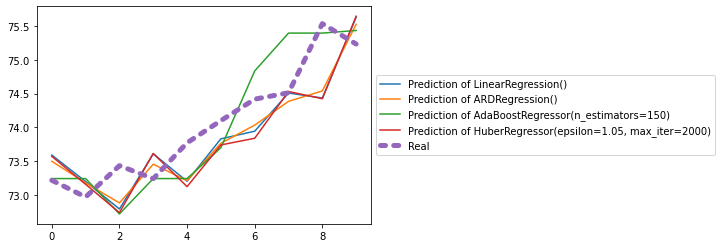

In [6]:
# Для очистки совести, выберем еще 3 модели регрессии и сравним с линейной
mor_model = ARDRegression()               # и так идеальна, выдает лучше чем обычная линейная \0/
ada_model = AdaBoostRegressor(n_estimators = 150)           # при стандарте - 0.58, так частенько 0.47-0.55
                                                            # но вообще незаметно чтобы ее параметры часто влияли
hub_model = HuberRegressor(max_iter = 2000, epsilon = 1.05) # 0.45 и предупреждение при стандарте 
                                                            # а вот при большем числе итераций и меньшем эпсилоне - чемпион
make_and_paint(lr_model, mor_model, ada_model, hub_model)   #

## Переходим на длительные предсказания (на прогнозы не похоже)
### 7

In [7]:
# Предсказания на 7 дней вперед. 
# Немного переделаем нашу функцию
def fill_all_7(past = 28):  # Вынесем в отдельную функцию все для заполнения выборок
    past_days = []               # из чего составляем данные
    current_days = []
    past_columns = []
    future_columns = []
    global rate, length
    for day in range(past, length-6):
        slc = list(rate[(day-past):day])
        past_days.append(slc)
        slc_future = list(rate[day:day+7])   # Кажется что должно быть +6, не забывать про особенность массивов pandas
        current_days.append(slc_future) 
    for i in range(past):
        past_columns.append(f"past_{i}")
    for i in range(7):
        future_columns.append(f"future_{i}")
    global X,y   # больше костылей для теста
    X = pandas.DataFrame(data=past_days, columns=past_columns)
    y = pandas.DataFrame(data=current_days, columns=future_columns)
    #y = pandas.Series(current_days, name='target') # Непонятная ошибка. По документации должно работать
    global X_train       # То же самое, но в виде кучи отдельных строк
    X_train = X[:-10]   
    global y_train
    y_train = y[:-10]   
    global X_test
    X_test = X[-10:]   
    global y_test
    y_test = y[-10:]

# TODO: Разобраться и добавить работающий коннектор к БД

In [8]:
# Заполним массивы по новому
fill_all_7()
y_test
   # ну вроде выводится

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
851,73.0397,73.6376,73.7750,73.1522,73.2351,73.6067,73.2157
852,73.6376,73.7750,73.1522,73.2351,73.6067,73.2157,72.9676
853,73.7750,73.1522,73.2351,73.6067,73.2157,72.9676,73.4321
854,73.1522,73.2351,73.6067,73.2157,72.9676,73.4321,73.2392
855,73.2351,73.6067,73.2157,72.9676,73.4321,73.2392,73.7711
856,73.6067,73.2157,72.9676,73.4321,73.2392,73.7711,74.0999
857,73.2157,72.9676,73.4321,73.2392,73.7711,74.0999,74.4184
858,72.9676,73.4321,73.2392,73.7711,74.0999,74.4184,74.5126
859,73.4321,73.2392,73.7711,74.0999,74.4184,74.5126,75.5379
860,73.2392,73.7711,74.0999,74.4184,74.5126,75.5379,75.2354


MAE равно 0.5972131825288143; MSQE равно 0.6285261673349749, что бы это не значило


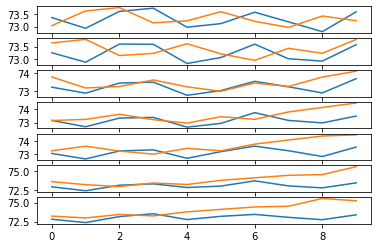

In [9]:
# Все ниженаписанное (да и, возможно, вышенаписанное) по моему является абсолютно неверным из-за 
# неправильного понимания задания. Ну да ладно, что-то получилось, что-то даже нарисовалось. 
# Но не уверен что смогу придумать, что именно нарисовалось, и уж точно 
# не поставлю денег на правильность этих предсказаний :D

# TODO: завернуть в функцию, ато расплодилось опять

lr_model.fit(X_train, y_train)
na = np.array(y_test)
prediction = lr_model.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

MAE равно 0.5961746737184216; MSQE равно 0.626453284191408, что бы это не значило


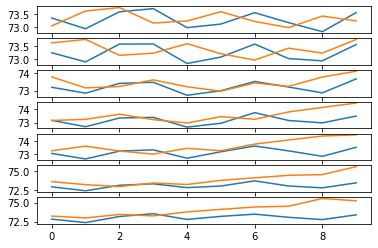

In [10]:
# Повторяем тот-же фокус с MLP четвертой модели
mlp_model4.fit(X_train, y_train)
na = np.array(y_test)
prediction = mlp_model4.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

#print(prediction)
fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

MAE равно 0.5189927306031482; MSQE равно 0.4807615049272117, что бы это не значило


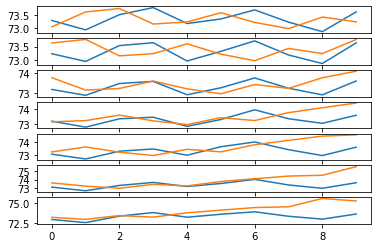

In [11]:
# MLP пятой модели
mlp_model5.fit(X_train, y_train)
na = np.array(y_test)
prediction = mlp_model5.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

#print(prediction)
fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

MAE равно 0.5924716375473463; MSQE равно 0.6167488562318725, что бы это не значило


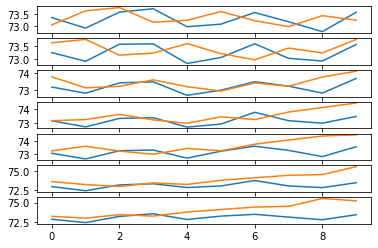

In [12]:
# MLP шестой модели
mlp_model6.fit(X_train, y_train)
na = np.array(y_test)
prediction = mlp_model6.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

#print(prediction)
fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

MAE равно 0.4689736283652636; MSQE равно 0.39205867247040366, что бы это не значило


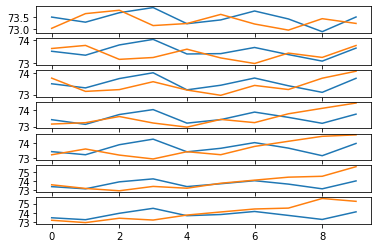

In [13]:
# MLP седьмой модели
mlp_model7.fit(X_train, y_train)
na = np.array(y_test)
prediction = mlp_model7.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

#print(prediction)
fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

MAE равно 0.5915497528418404; MSQE равно 0.6124519947377408, что бы это не значило


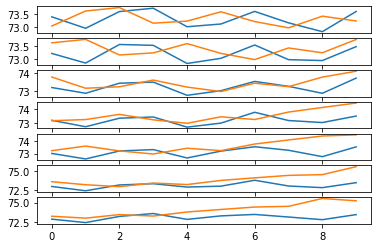

In [14]:
# MLP восьмой модели
mlp_model8.fit(X_train, y_train)
na = np.array(y_test)
prediction = mlp_model8.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

#print(prediction)
fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

MAE равно 0.4888037805619649; MSQE равно 0.4068383984523248, что бы это не значило


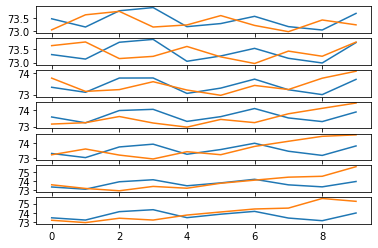

In [15]:
# MLP девятой модели
mlp_model9.fit(X_train, y_train)
na = np.array(y_test)
prediction = mlp_model9.predict(X_test)
mae = mean_absolute_error(prediction, y_test)
msqe = mean_squared_error(prediction, y_test)
print('\033[1m' + f"MAE равно {mae}; MSQE равно {msqe}, что бы это не значило" + '\033[0m')
x = list(range(0,10))

#print(prediction)
fig, axs = plt.subplots(7)
for i in range(7):
    axs[i].plot(x, prediction[:,i])
    axs[i].plot(x, na[:,i])

In [16]:
# Лучше всего работают 5 и 9 модели MLP, но средняя ошибка около рубля

MAE of LinearRegression() = 0.4074061021595199
MSQE of LinearRegression() = 0.23239187544366652
MAE of MLPRegressor(activation='identity', hidden_layer_sizes=(100, 200, 300),
             max_iter=5000, solver='lbfgs') = 0.401452197787674
MSQE of MLPRegressor(activation='identity', hidden_layer_sizes=(100, 200, 300),
             max_iter=5000, solver='lbfgs') = 0.22229653670478142
MAE of MLPRegressor(hidden_layer_sizes=(100, 200, 300), max_iter=5000, solver='lbfgs') = 0.4003421335261933
MSQE of MLPRegressor(hidden_layer_sizes=(100, 200, 300), max_iter=5000, solver='lbfgs') = 0.22424452629441163
Best model was MLPRegressor(hidden_layer_sizes=(100, 200, 300), max_iter=5000, solver='lbfgs') with mae = 0.4003421335261933 msqe = 0.22424452629441163


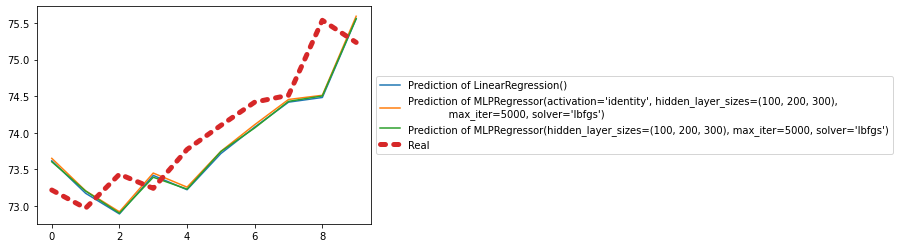

In [17]:
# Возьмем отрезки по 7 дней, а не по 28, и снова посмотрим на погрешность
fill_all(7)
# И заново обработаем наши используемые модели
make_and_paint(lr_model, mlp_model6, mlp_model7)

MAE of LinearRegression() = 0.4074061021595199
MSQE of LinearRegression() = 0.23239187544366652
MAE of ARDRegression() = 0.3961161402203075
MSQE of ARDRegression() = 0.221417270675461
MAE of AdaBoostRegressor(n_estimators=150) = 0.3723555982667506
MSQE of AdaBoostRegressor(n_estimators=150) = 0.16675219269641608
MAE of HuberRegressor(epsilon=1.05, max_iter=2000) = 0.4338103289591544
MSQE of HuberRegressor(epsilon=1.05, max_iter=2000) = 0.26772797671766757
Best model was AdaBoostRegressor(n_estimators=150) with mae = 0.3723555982667506 msqe = 0.16675219269641608


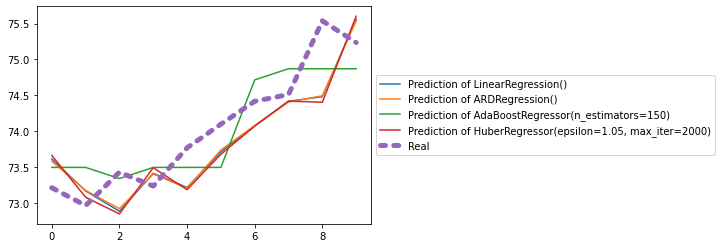

In [18]:
make_and_paint(lr_model, mor_model, ada_model, hub_model)
# В общем можно сделать вывод что уменьшив количество дней для обучения погрешность растет при частых колебаниях
# знака производной и снижается при сохранении знака производной

# TODO: Сериализовать модель-победителя во внешний файл